In [1]:
#Time Series Forecasting for Business Insights: Project for ABC Corporation


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Time Series Forecasting for Business Insights Project for ABC Corporation.csv")

In [4]:
df

,Date,Sales_Figure,Website_Traffic,Inventory_Level,Temperature,Marketing_Spend
0,01-Jan-22,1000,2000,150,25°C,5000
1,02-Jan-22,1200,2200,160,23°C,5500
2,03-Jan-22,950,1800,140,20°C,4800
3,04-Jan-22,1100,2100,155,22°C,5200
4,05-Jan-22,1350,2400,170,26°C,5900
5,06-Jan-22,900,1700,130,19°C,4500
6,07-Jan-22,1050,1900,145,21°C,4900
7,08-Jan-22,1250,2300,165,24°C,5600
8,09-Jan-22,980,2000,152,23°C,5200
9,10-Jan-22,1120,2200,158,25°C,5400


In [7]:
# Display the first few rows of the DataFrame
print(df.head())


        Date  Sales_Figure  Website_Traffic  Inventory_Level Temperature  \
0  01-Jan-22          1000             2000              150        25°C   
1  02-Jan-22          1200             2200              160        23°C   
2  03-Jan-22           950             1800              140        20°C   
3  04-Jan-22          1100             2100              155        22°C   
4  05-Jan-22          1350             2400              170        26°C   

   Marketing_Spend  
0             5000  
1             5500  
2             4800  
3             5200  
4             5900  


In [8]:

# Check the data types and basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             26 non-null     object
 1   Sales_Figure     26 non-null     int64 
 2   Website_Traffic  26 non-null     int64 
 3   Inventory_Level  26 non-null     int64 
 4   Temperature      26 non-null     object
 5   Marketing_Spend  26 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ KB
None


In [9]:

# Perform exploratory data analysis (EDA) to gain insights into the dataset
# Summary statistics
print(df.describe())


       Sales_Figure  Website_Traffic  Inventory_Level  Marketing_Spend
count     26.000000        26.000000        26.000000        26.000000
mean    1059.230769      2453.846154       170.115385      5923.076923
std       91.961865       409.322141        18.571649       752.865296
min      900.000000      1700.000000       130.000000      4500.000000
25%     1008.500000      2200.000000       158.500000      5425.000000
50%     1046.000000      2415.000000       169.500000      5890.000000
75%     1077.500000      2775.000000       184.250000      6512.500000
max     1350.000000      3150.000000       201.000000      7200.000000


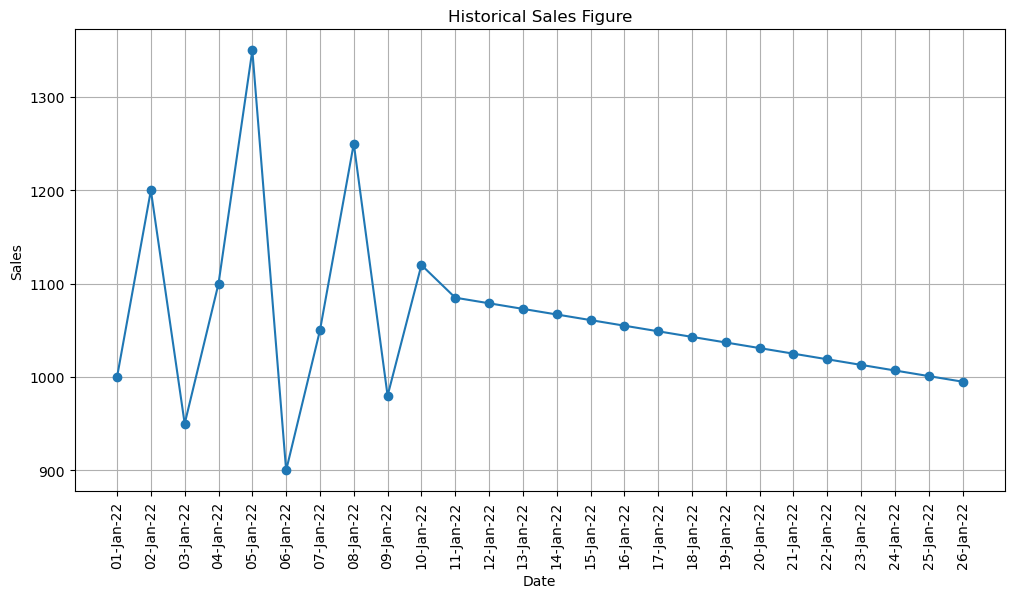

In [12]:
# Visualize the time series data with rotated x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales_Figure'], marker='o', linestyle='-')
plt.title('Historical Sales Figure')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()



Date               0
Sales_Figure       0
Website_Traffic    0
Inventory_Level    0
Temperature        0
Marketing_Spend    0
dtype: int64


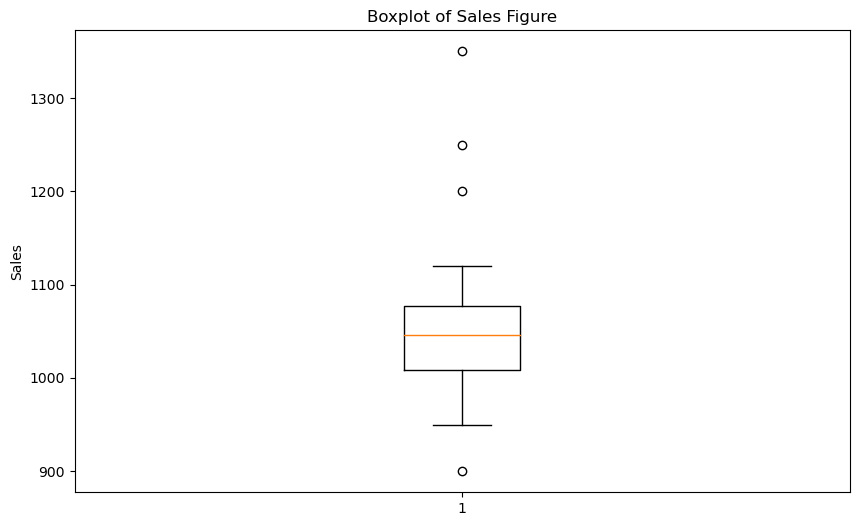

In [13]:
# Handle missing values, outliers, and perform necessary data preprocessing
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Check for outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales_Figure'])
plt.title('Boxplot of Sales Figure')
plt.ylabel('Sales')
plt.show()

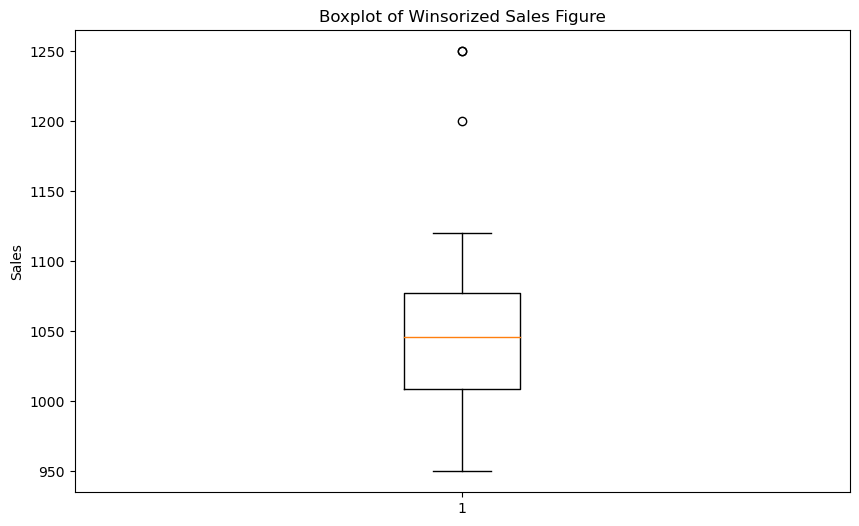

In [14]:
# Handle outliers using Winsorization
from scipy.stats import mstats

# Winsorize the 'Sales_Figure' column
df['Sales_Figure_winsorized'] = mstats.winsorize(df['Sales_Figure'], limits=[0.05, 0.05])

# Visualize the winsorized data
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales_Figure_winsorized'])
plt.title('Boxplot of Winsorized Sales Figure')
plt.ylabel('Sales')
plt.show()


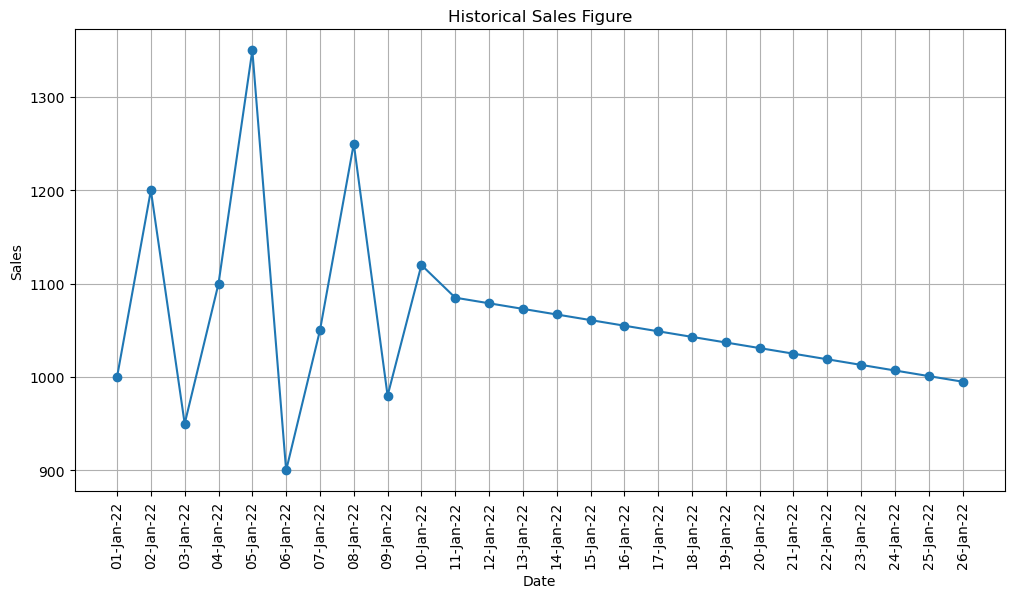

In [17]:
# Plot the sales figures over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales_Figure'], marker='o', linestyle='-')
plt.title('Historical Sales Figure')
plt.xlabel('Date')
plt.xticks(rotation=90) 
plt.ylabel('Sales')
plt.grid(True)
plt.show()


ADF Statistic: -2.771326922994947
p-value: 0.06248767570581315
Critical Values: {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}


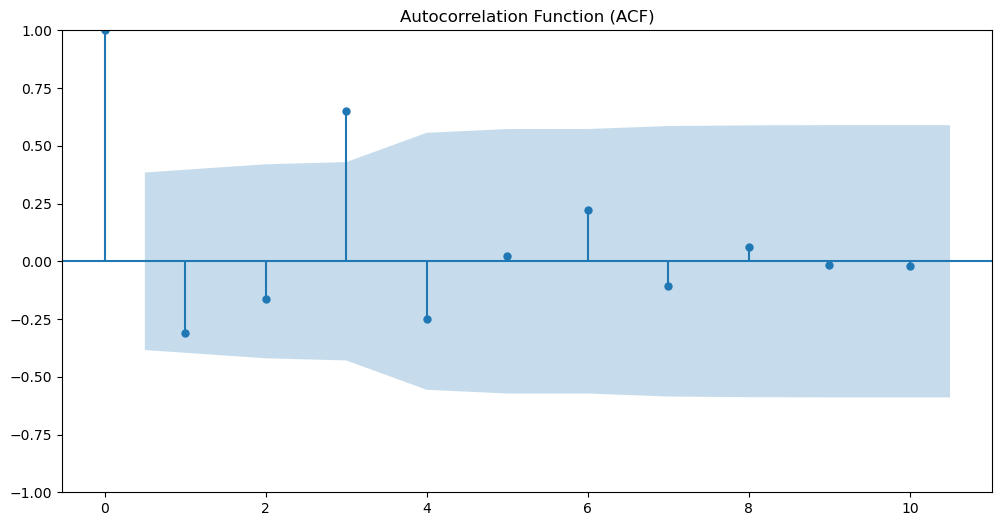

G:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


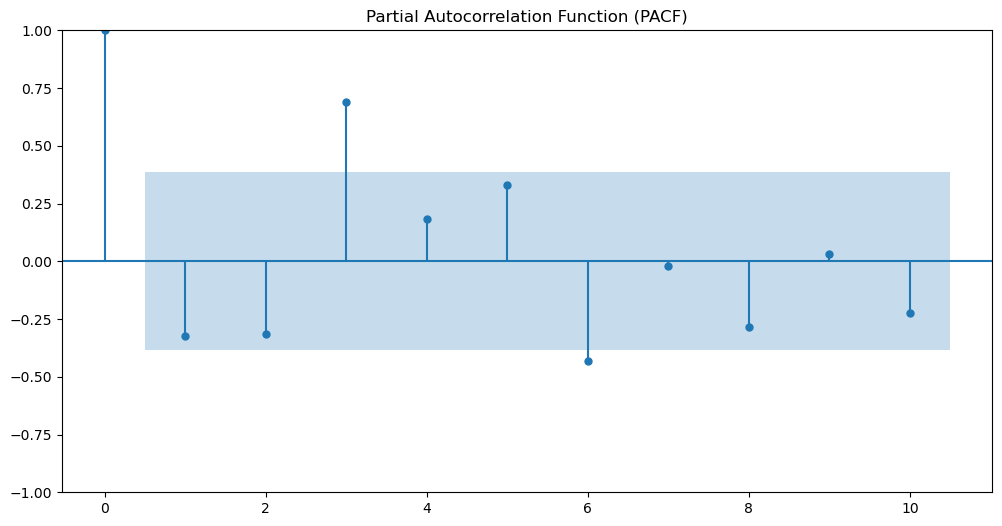

In [22]:
# Import necessary libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check for stationarity using ADF test
result = adfuller(df['Sales_Figure'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Calculate the maximum number of lags allowed (set to a smaller value)
max_lags = 10

# Analyze autocorrelation and partial autocorrelation functions with reduced number of lags
plt.figure(figsize=(12, 6))
plot_acf(df['Sales_Figure'], lags=max_lags, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Sales_Figure'], lags=max_lags, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


ADF Statistic (Differenced): -9.10391917499566
p-value (Differenced): 3.5445333322782857e-15
Critical Values (Differenced): {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}


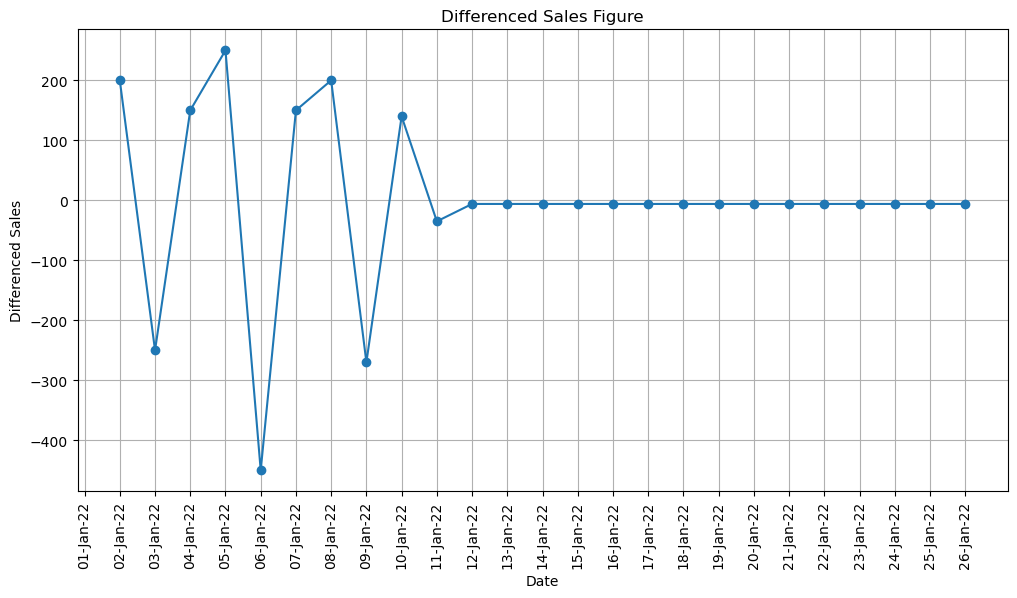

In [24]:
import numpy as np

# Perform differencing to achieve stationarity (if necessary)
# For example, let's try first-order differencing
df['Sales_Figure_diff'] = df['Sales_Figure'].diff()

# Check for stationarity of the differenced series
result_diff = adfuller(df['Sales_Figure_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales_Figure_diff'], marker='o', linestyle='-')
plt.title('Differenced Sales Figure')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [26]:
#Based on these results, we can conclude that the differenced series 
#is likely stationary. This suggests that first-order differencing 
#is sufficient to achieve stationarity in the data. 
#Therefore, we can proceed with fitting an ARIMA model to the 
#differenced series.

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% of data for training, 20% for testing
train, test = df['Sales_Figure'][:train_size], df['Sales_Figure'][train_size:]

# Define the ARIMA model
# We'll start with a simple ARIMA(1, 1, 1) model
model = ARIMA(train, order=(1, 1, 1))

# Fit the ARIMA model
fitted_model = model.fit()

# Forecast on the test set
forecast = fitted_model.forecast(steps=len(test))

# Calculate evaluation metrics
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 63.9323889950913


In [29]:
import itertools

# Define ranges for p, d, q
p_range = range(0, 3)  # Example range for p
d_range = range(0, 2)  # Example range for d
q_range = range(0, 3)  # Example range for q

# Generate all possible combinations of p, d, q
hyperparameters = list(itertools.product(p_range, d_range, q_range))

# Perform grid search to find optimal hyperparameters
best_rmse = float('inf')
best_params = None

for params in hyperparameters:
    try:
        model = ARIMA(train, order=params)
        fitted_model = model.fit()
        forecast = fitted_model.forecast(steps=len(test))
        rmse = sqrt(mean_squared_error(test, forecast))
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = params
    except:
        continue

print("Best RMSE:", best_rmse)
print("Best Hyperparameters (p, d, q):", best_params)


G:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
G:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best RMSE: 23.366642891095847
Best Hyperparameters (p, d, q): (0, 1, 0)


In [30]:
# Train the refined ARIMA model with the best hyperparameters
refined_model = ARIMA(train, order=best_params)
refined_fitted_model = refined_model.fit()

# Forecast using the refined model
refined_forecast = refined_fitted_model.forecast(steps=len(test))

# Evaluate the performance of the refined model using RMSE
refined_rmse = sqrt(mean_squared_error(test, refined_forecast))
print("RMSE of Refined Model:", refined_rmse)


RMSE of Refined Model: 23.366642891095847


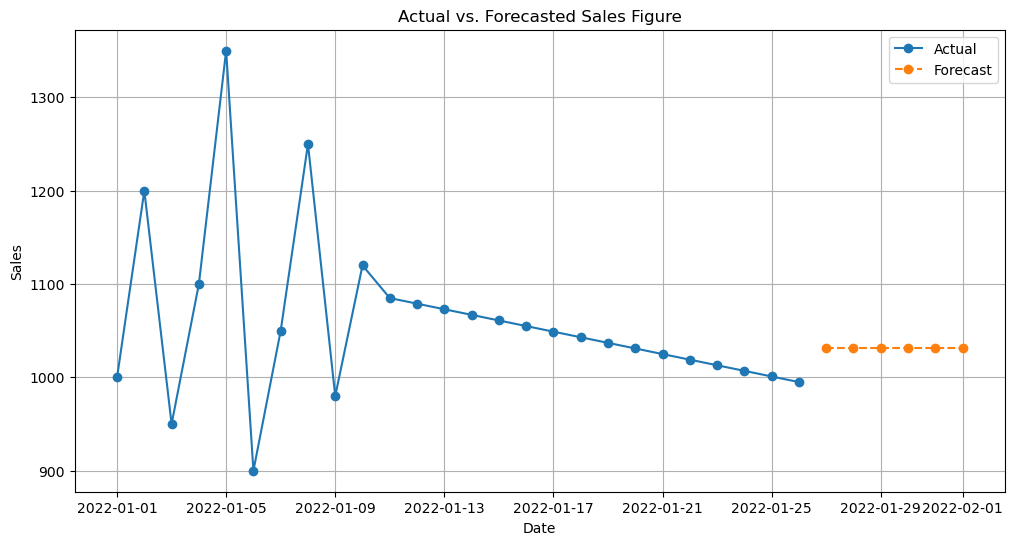

In [35]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert the timezone of existing dates to UTC
existing_dates_utc = df['Date'].dt.tz_localize(None).dt.tz_localize(UTC)

# Forecast future time periods using the refined ARIMA model
forecast_steps = len(test)  # Forecast for the same number of steps as the testing set
forecast_dates = pd.date_range(start=existing_dates_utc.iloc[-1], periods=forecast_steps + 1, tz=UTC)
forecast = refined_fitted_model.forecast(steps=forecast_steps)

# Visualize the forecasted values along with the actual data
plt.figure(figsize=(12, 6))
plt.plot(existing_dates_utc, df['Sales_Figure'], label='Actual', marker='o', linestyle='-')
plt.plot(forecast_dates[1:], forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs. Forecasted Sales Figure')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
